<h1><center> Math761 - HW 7 <br>
   Bootstrap, Jackknife, and EM</center> </h1>
   


## General Instructions

_This homework requires you two submit two things now and one thing later:_

1) A jupyter notebook (.ipynb file) which will include your code, the results from when you ran the code, and textual interpetations as asked in the questions.

2) A video (10 minute max, with 4 extra minutes if you do the EC).  Each question specifies the part you need to explain by video. For example, if part a of question 1 says "**Explain in Video**", then after you have finished writing up your work **(which may include math calculations as well as code)** to your satisfaction (or to the point where you have to submit before the deadline!), please record a video where you go over your work (math and code) and explain what each part of it does and the role each part plays in helping you to achieve the statistical goal of the question. Note that the whole video you submit for your whole assignment should be 10 minutes or less. If your video goes over the max limit, I will only grade or give feedback up to the max limit. This is so that I can give everyone feedback in a timely manner. It may be helpful if you rehearse your video before you record it or use a video editor (Da Vinci is free) to help you keep your video under the time limit while letting you cover all the important information you want to explain.

3) No revision for this one! I'll grade the first two questions here.
<br>

_Grading_:
The grading rubric is here https://docs.google.com/document/d/1A_Gris-kMxTLneroCO2h0cvbsqmQTSkYc2WQGSsgURU/edit?usp=sharing.




<br>

### Exercise 1

**Explain all parts in video**

Consider the `scor` data from the `bootstrap` package. It gives the test scores for 88 students in five subjects: mechanics, vectors, algebra, analysis, and statistics.

In [4]:
install.packages("bootstrap")

data("scor", package="bootstrap")
scor

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,mec,vec,alg,ana,sta
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,77,82,67,67,81
2,63,78,80,70,81
3,75,73,71,66,81
4,55,72,63,70,68
5,63,63,65,70,63
6,53,61,72,64,73
7,51,67,65,65,68
8,59,70,68,62,56
9,62,60,58,62,70


#### a) Because mechanics and vectors were closed book tests while the other three subjects were open book tests, it can be interesting to look at the correlation between mechanics and vectors versus the correlation between analysis and statistics versus the correlation between mechanics and statistics. Report these three correlations and then find the bootstrap estimates of the standard error and bias of the sample correlations. Use 2000 bootstrap replications for each. Then please combine these results in a table. Also make  histograms of the bootstrapped correlations (3, one for each correlation).

**hint** When I use set.seed(1), the bootstrapped bias between Mechanics and Vectors is `-0.0057183621`.

#### b) Also report the jackknife estimates of the bias and standard error for the sample correlations (between mechanics and vectors; between analysis and statistics; and between mechanics and statistics). Please put these in a table as well and make histograms!

**hint** For the jackknifed bias between Mechanics and Vectors, I got `-0.005038`.


#### c) Are any of the biases considered serious enough to adjust for? Explain why or why not.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



                  Pair Sample_Correlation Bootstrap_SE Bootstrap_Bias
1    Mechanics-Vectors          0.5534052   0.07565361  -0.0057183621
2  Analysis-Statistics          0.6071743   0.06817135   0.0005946845
3 Mechanics-Statistics          0.3890993   0.10575362  -0.0046518591


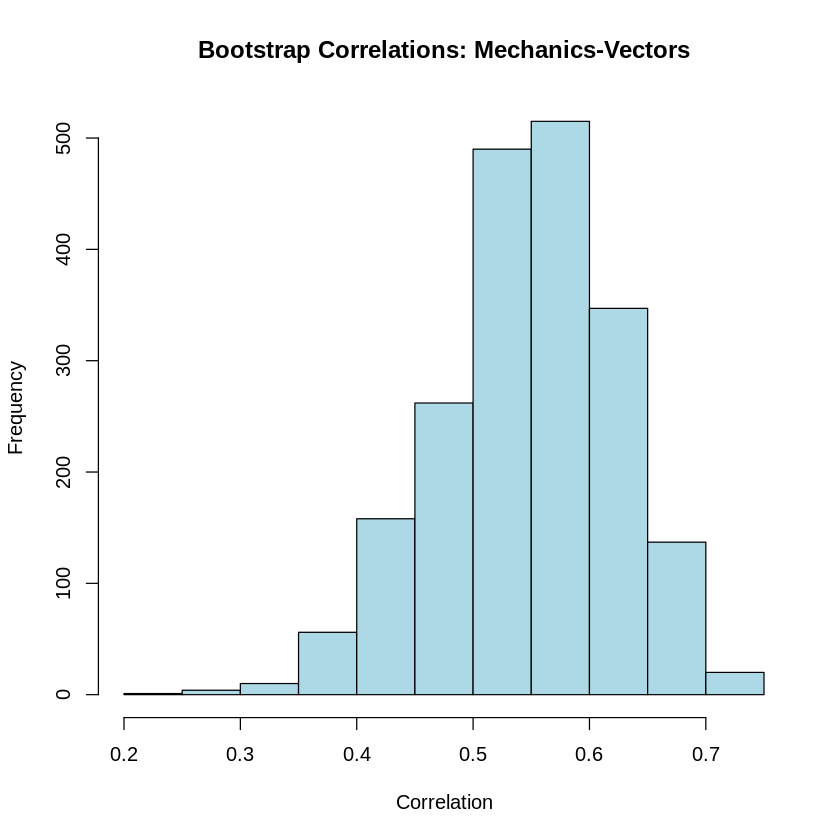

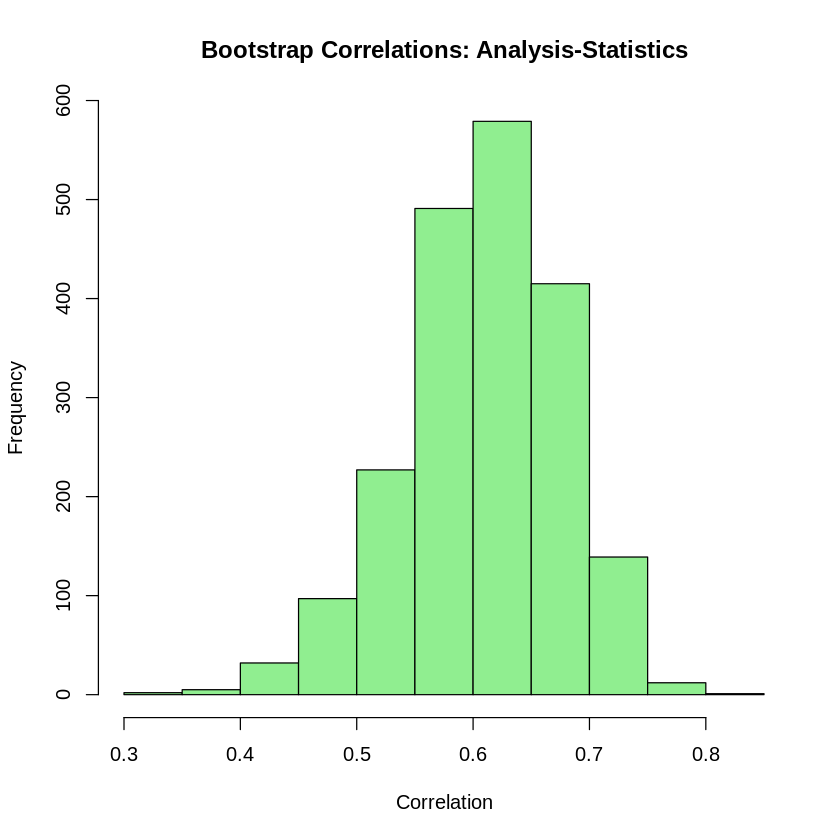

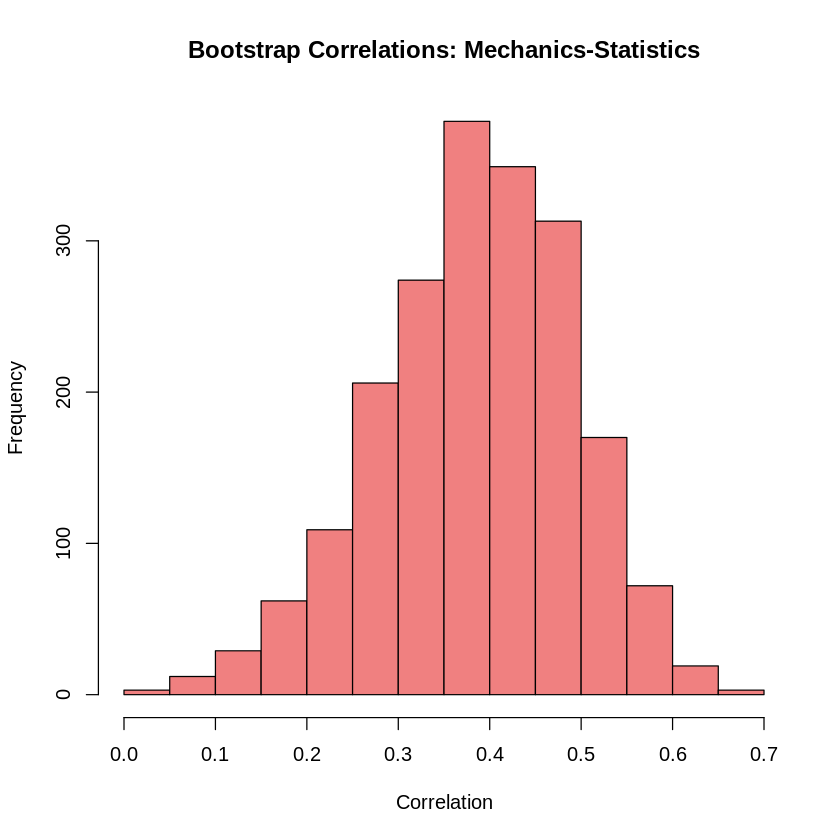

In [6]:
# Exercise 1A
install.packages("bootstrap")
set.seed(1)
# Loading required library and dataset again
library(bootstrap)
data("scor", package = "bootstrap")

# Defining a function to calculate the bootstrap correlations
bootstrap_correlation <- function(data, var1, var2, n_bootstrap) {
  n <- nrow(data)
  theta <- cor(data[[var1]], data[[var2]])  # The original correlation
  thetastar <- numeric(n_bootstrap)  # Initialising the bootstrap correlations

  for (i in 1:n_bootstrap) {
    indices <- sample(1:n, replace = TRUE)  # Resampling with a replacement
    thetastar[i] <- cor(data[indices, var1], data[indices, var2])  # Bootstrap correlation
  }

  # Returning the original correlation, bootstrap correlations, standard error, and bias
  list(
    original_correlation = theta,
    bootstrap_correlations = thetastar,
    se = sd(thetastar),
    bias = mean(thetastar) - theta
  )
}

# Performing bootstrap for three different variable pairs
bootstrap_mechanics_vectors <- bootstrap_correlation(scor, "mec", "vec", 2000)
bootstrap_analysis_statistics <- bootstrap_correlation(scor, "ana", "sta", 2000)
bootstrap_mechanics_statistics <- bootstrap_correlation(scor, "mec", "sta", 2000)

# Creating a summary table of the results
bootstrap_results <- data.frame(
  Pair = c("Mechanics-Vectors", "Analysis-Statistics", "Mechanics-Statistics"),
  Sample_Correlation = c(
    bootstrap_mechanics_vectors$original_correlation,
    bootstrap_analysis_statistics$original_correlation,
    bootstrap_mechanics_statistics$original_correlation
  ),
  Bootstrap_SE = c(
    bootstrap_mechanics_vectors$se,
    bootstrap_analysis_statistics$se,
    bootstrap_mechanics_statistics$se
  ),
  Bootstrap_Bias = c(
    bootstrap_mechanics_vectors$bias,
    bootstrap_analysis_statistics$bias,
    bootstrap_mechanics_statistics$bias
  )
)

# Printing the results table as per the question
print(bootstrap_results)

# Plotting three different histograms of the bootstrap correlations
hist(
  bootstrap_mechanics_vectors$bootstrap_correlations,
  main = "Bootstrap Correlations: Mechanics-Vectors",
  xlab = "Correlation",
  col = "lightblue"
)

hist(
  bootstrap_analysis_statistics$bootstrap_correlations,
  main = "Bootstrap Correlations: Analysis-Statistics",
  xlab = "Correlation",
  col = "lightgreen"
)

hist(
  bootstrap_mechanics_statistics$bootstrap_correlations,
  main = "Bootstrap Correlations: Mechanics-Statistics",
  xlab = "Correlation",
  col = "lightcoral"
)

                  Pair Jackknife_SE Jackknife_Bias
1    Mechanics-Vectors   0.07797243  -5.791219e-05
2  Analysis-Statistics   0.06958215  -1.685009e-05
3 Mechanics-Statistics   0.11103673  -3.979118e-05


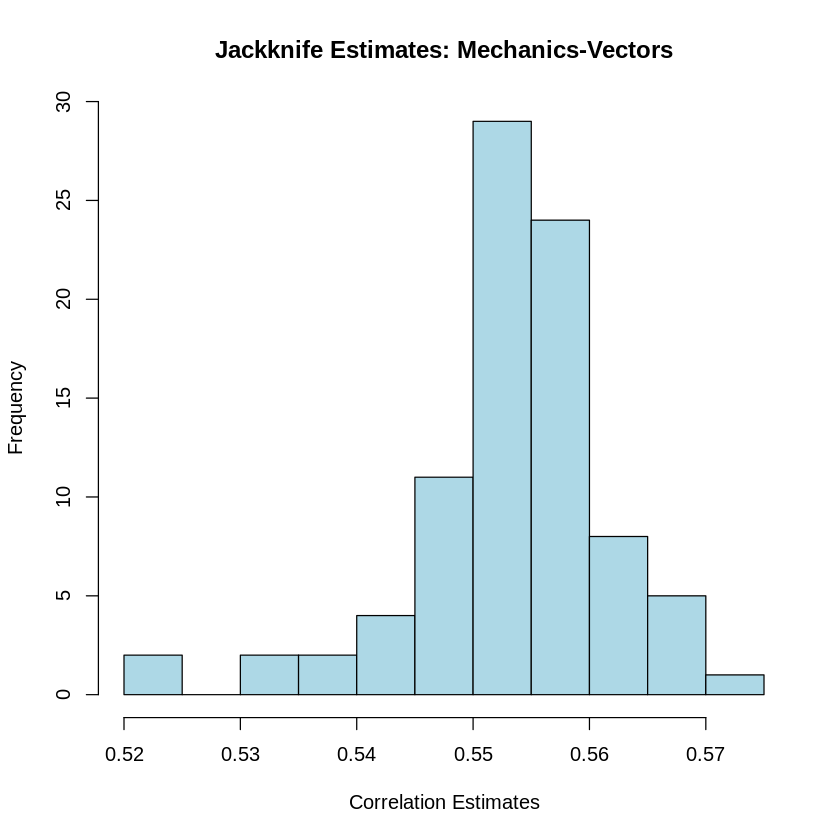

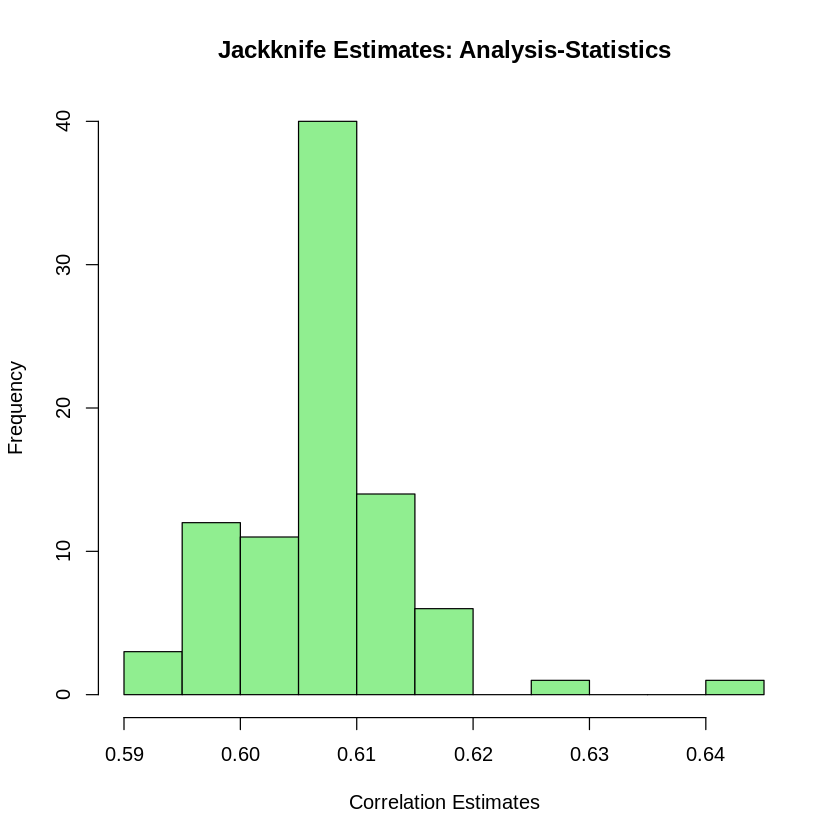

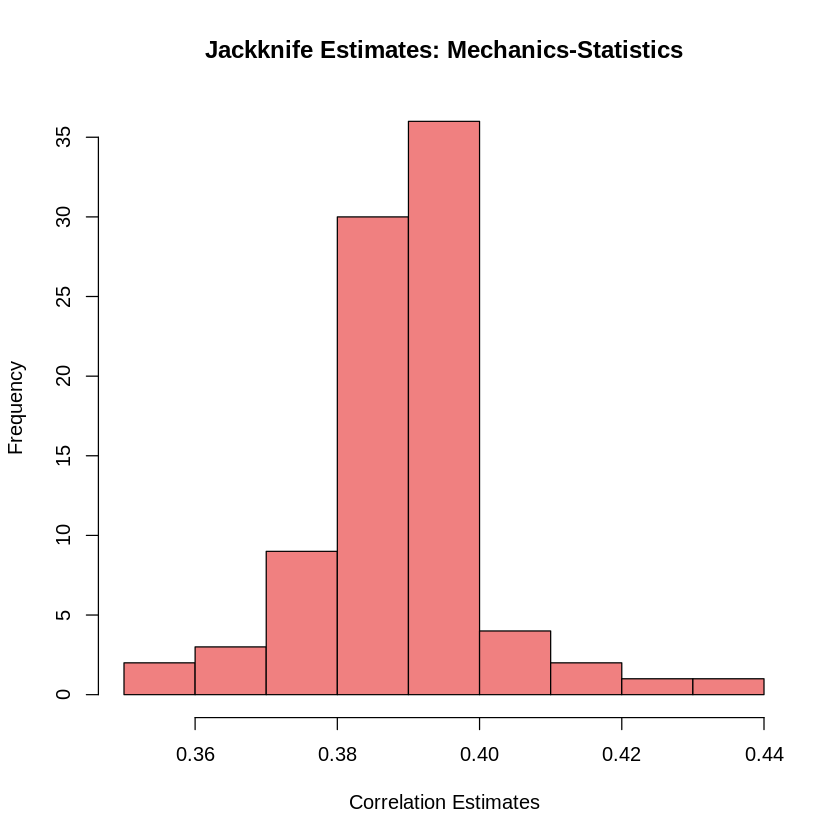

In [8]:
# Exercise 1B
# Defining a function for jackknife
jackknife_correlation <- function(data, var1, var2) {
  n <- nrow(data)  # The number of observations
  jack_correlations <- numeric(n)  # Initialising jackknife correlations

  # Leave-one-out resampling method
  for (i in 1:n) {
    subset_data <- data[-i, ]  # Excluding the i-th observation
    jack_correlations[i] <- cor(subset_data[[var1]], subset_data[[var2]])
  }

  # Returning the mean, standard error, bias, and jackknife estimates
  list(
    mean = mean(jack_correlations),
    se = sd(jack_correlations) * sqrt(n - 1),  # Standard error adjusted for jackknife method
    bias = mean(jack_correlations) - cor(data[[var1]], data[[var2]]),
    estimates = jack_correlations  # Storing all the jackknife estimates
  )
}

# Computing the jackknife estimates for the specified pairs of variables
jack_mechanics_vectors <- jackknife_correlation(scor, "mec", "vec")
jack_analysis_statistics <- jackknife_correlation(scor, "ana", "sta")
jack_mechanics_statistics <- jackknife_correlation(scor, "mec", "sta")

# Creating a summary table for the results
jackknife_results <- data.frame(
  Pair = c("Mechanics-Vectors", "Analysis-Statistics", "Mechanics-Statistics"),
  Jackknife_SE = c(
    jack_mechanics_vectors$se,
    jack_analysis_statistics$se,
    jack_mechanics_statistics$se
  ),
  Jackknife_Bias = c(
    jack_mechanics_vectors$bias,
    jack_analysis_statistics$bias,
    jack_mechanics_statistics$bias
  )
)

# Printing the jackknife results table
print(jackknife_results)

# Plotting separate histograms for the jackknife estimates
hist(
  jack_mechanics_vectors$estimates,
  main = "Jackknife Estimates: Mechanics-Vectors",
  xlab = "Correlation Estimates",
  col = "lightblue"
)

hist(
  jack_analysis_statistics$estimates,
  main = "Jackknife Estimates: Analysis-Statistics",
  xlab = "Correlation Estimates",
  col = "lightgreen"
)

hist(
  jack_mechanics_statistics$estimates,
  main = "Jackknife Estimates: Mechanics-Statistics",
  xlab = "Correlation Estimates",
  col = "lightcoral"
)

## Part C :

The biases observed here in the bootstrap and jackknife analyses are quite small, especially when comparing to the values of the original correlations. Biases are considered serious if they can significantly alter the interpretation of the result or the final conclusion we can draw. Since the biases here are very small, they are not large enough to need any adjustments to account for them. The standard errors and the original sample correlations are sufficiently accuracate for practical purposes.

### Exercise 2

**Explain all parts in video**

In principle component analysis,

$$
\theta = \frac{\lambda_1}{\sum_{j=1}^{5}\lambda_j}
$$

represents the amount of variance explained by the largest eigenvector (to which this eigenvalue corresponds), which you can get by eigenvalue decomposition of the correlation matrix $\Sigma$. The eigenvector corresponding to the largest eigenvalue gives you the direction in which the data varies most!

For the data in `scor`, you can estimate $\theta$ using

$$
\hat{\theta} = \frac{\hat{\lambda_1}}{\sum_{j=1}^{5}\hat{\lambda_j}}
$$

by following these steps:

1. Calculate sample correlation $\hat{\Sigma}$
2. Use eigenvalue decomposition to get $\hat{\lambda_i}$ for i = 1, ..., 5
3. Let the largest $\hat{\lambda_i}$ be $\hat{\lambda_1}$
4. Compute $\hat{\theta}$ from your obtained values


#### a) Compute the se and bias of this estimator using 2000 bootstrap estimates. Put the results in a table please and draw a histogram of the bootstrapped esitmates!

** Hint** For the bootstrapped bias, with set.seed(1), I got `-0.001415296`.

#### b) Compute the se and bias of this estimator using the jackknife estimates. Put the results in a table please and draw a histogram of the jackknifed estimates!

** Hint** For the jackknifed bias, I got `-0.0003778535`.


#### c) Are any of the biases considered serious enough to adjust for? Explain why or why not.


  Estimate Bootstrap_SE Bootstrap_Bias
1 0.636196   0.04208801   -0.001415296


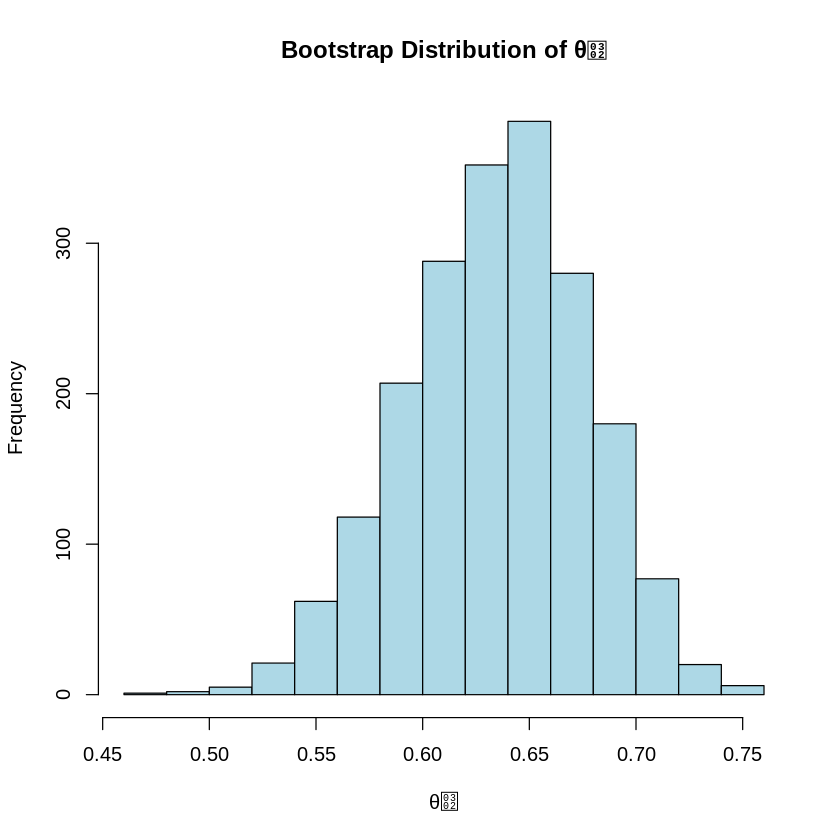

In [10]:
set.seed(1)
# Exercise 2A
# Calculating the sample correlation matrix
hat_Sigma <- cor(scor)

# Perform eigenvalue decomposition and computing theta_hat
eigen_values <- eigen(hat_Sigma)$values
hat_theta <- eigen_values[1] / sum(eigen_values)

# Defining the bootstrap function for theta
bootstrap_theta <- function(data, n_bootstrap) {
  thetas <- numeric(n_bootstrap)  # Initialize theta estimates

  for (i in 1:n_bootstrap) {
    # Generating the bootstrap sample
    sample_indices <- sample(nrow(data), replace = TRUE)
    sample_data <- data[sample_indices, ]

    # Computing the correlation matrix and eigenvalues
    sample_correlation <- cor(sample_data)
    sample_eigen_values <- eigen(sample_correlation)$values

    # Computing the theta values for the bootstrap sample
    thetas[i] <- sample_eigen_values[1] / sum(sample_eigen_values)
  }

  # Returning the original theta, bootstrap estimates, SE, and bias values
  list(
    original_theta = hat_theta,
    bootstrap_thetas = thetas,
    se = sd(thetas),
    bias = mean(thetas) - hat_theta
  )
}

# Performing bootstrap analysis with 2000 replications
bootstrap_results_theta <- bootstrap_theta(scor, 2000)

# Creating a summary table of the results
bootstrap_table_theta <- data.frame(
  Estimate = bootstrap_results_theta$original_theta,
  Bootstrap_SE = bootstrap_results_theta$se,
  Bootstrap_Bias = bootstrap_results_theta$bias
)

# Printing the results table
print(bootstrap_table_theta)

# Plotting the histogram of the bootstrap estimates
hist(
  bootstrap_results_theta$bootstrap_thetas,
  main = "Bootstrap Distribution of θ̂",
  xlab = "θ̂",
  col = "lightblue"
)

  Estimate Jackknife_SE Jackknife_Bias
1 0.636196   0.04466684  -4.343143e-06


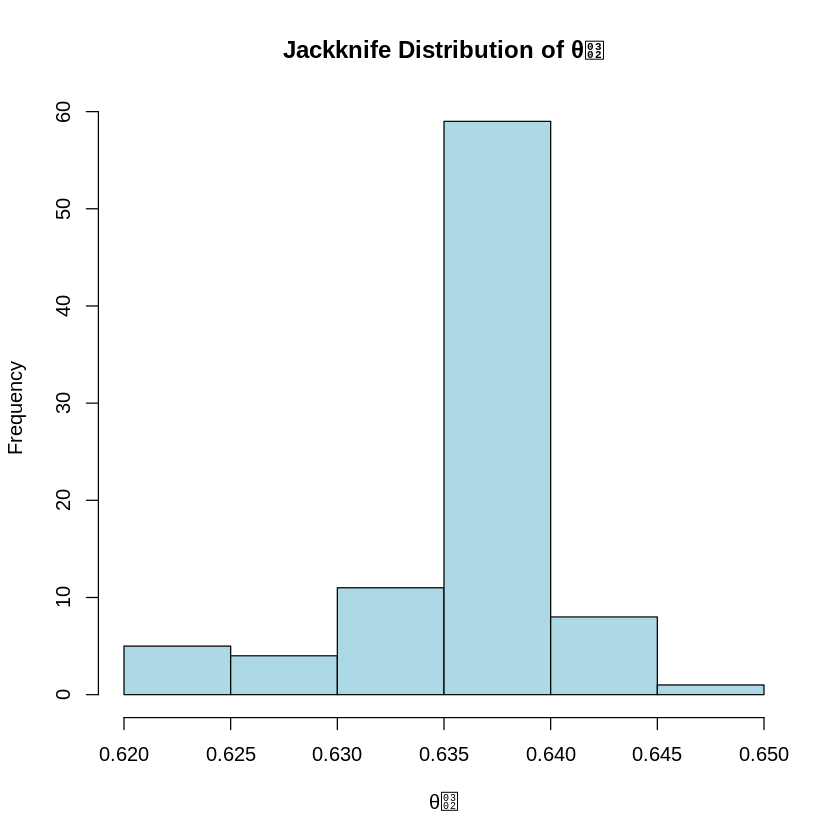

In [13]:
# Exercise 2B
# Defining the jackknife function for theta
jackknife_theta <- function(data) {
  n <- nrow(data)  # The number of observations
  theta_values <- numeric(n)  # Initialising the theta estimates

  for (i in 1:n) {
    # Leaving one of the observations out
    sample_data <- data[-i, ]

    # Computing the correlation matrix and eigenvalues
    sigma_hat <- cor(sample_data)
    eigenvalues <- eigen(sigma_hat)$values

    # Computing the theta for the jackknife sample
    theta_values[i] <- eigenvalues[1] / sum(eigenvalues)
  }

  # Returning the jackknife estimates
  theta_values
}

# Applying the jackknife function to the dataset
jackknife_results <- jackknife_theta(scor)

# Computing the SE and bias
n <- nrow(scor)
jackknife_se <- sqrt((n - 1) / n * sum((jackknife_results - mean(jackknife_results))^2))
jackknife_bias <- mean(jackknife_results) - hat_theta

# Creating a summary table for jackknife results
jackknife_table <- data.frame(
  Estimate = hat_theta,
  Jackknife_SE = jackknife_se,
  Jackknife_Bias = jackknife_bias
)

# Printing the results table
print(jackknife_table)

# Plotting the histogram of jackknife estimates
hist(
  jackknife_results,
  main = "Jackknife Distribution of θ̂",
  xlab = "θ̂",
  col = "lightblue"
)

## Part C :

The biases observed in both the bootstrap and jackknife methods are very small. These values are minimal when compared to the scale of theta, which is the proportion of variance compared to the largest eigenvalue. These small biases do not significantly affect the interpretation or conclusion in terms of the result.

Bias adjustment is  only necessary when the bias is large enough to alter the parameter estimate or lead to incorrect conclusions. In this case, the small biases fall within an acceptable limit and are unlikely to affect the validity of the estimated theta. Therefore, adjusting for these biases is unnecessary.

### Optional: Exercise 3 (worth 5 points EC on HW if you do it and explain it well)


You are presented with incomplete data from two coins, one copper and one silver.
The copper coin has $p1$ probability of landing heads up while the silver coin has $p2$ probability of landing heads up.

The data you see below, called "X", consists of $100$ coin tosses, where one of the two coins is selected at random and then tossed. If the coin lands heads up, a 1 is recorded for that toss. Otherwise, a 0 is recorded. You do not know which coin is used for each toss.

Use the EM algorithm to estimate $p1$ and $p2$. Please show your work for how you derive $Q(\theta_{t}|\theta_{t-1}, X)$ as well as the code to implement the EM algorithm and produce estimates for $p1$ and $p2$.




In [14]:
X =c(1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,
     1,0,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,
     1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,
     1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,
     1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1)


In [15]:
data = c(4.5,4.5,2.9719593223425,3.57714378873628,4.5,3.88310804477432,
         3.04268597197829,2.03521044807455,4.5,2.56138462269069,3.90321366953768,
         3.15185317373851,4.5,4.40557340594113,4.5,4.5,2.30671479632584,4.5,
         4.1986290616469,3.4745138268405,2.1461321020044,3.93849412317917,
         4.5,3.47752104301941,3.93658927002286)

In [21]:
set.seed(1)
p1 <- runif(1)  # Initial estimate for p1
p2 <- runif(1)  # Initial estimate for p2
tol <- 1e-6     # Convergence tolerance
max_iter <- 1000  # Maximum number of iterations

# EM Algorithm
for (iter in 1:max_iter) {
  # E-step
  gamma <- (p1^X * (1 - p1)^(1 - X)) /
           ((p1^X * (1 - p1)^(1 - X)) + (p2^X * (1 - p2)^(1 - X)))

  # M-step
  p1_new <- sum(gamma * X) / sum(gamma)
  p2_new <- sum((1 - gamma) * X) / sum(1 - gamma)

  # Checking for convergence
  if (abs(p1_new - p1) < tol && abs(p2_new - p2) < tol) {
    break
  }

  # Updating the parameters
  p1 <- p1_new
  p2 <- p2_new
}

# Final estimates
cat("Final estimates:\n")
cat("p1 (Copper coin):", p1, "\n")
cat("p2 (Silver coin):", p2, "\n")

Final estimates:
p1 (Copper coin): 0.4891344 
p2 (Silver coin): 0.610864 


### Self assessment:

Remember to take a moment to evaluate yourself on where you feel confident in your work and understanding and where you feel less confident in your work and understanding.